Text(0.5, 1.0, 'beta (ground truth)')

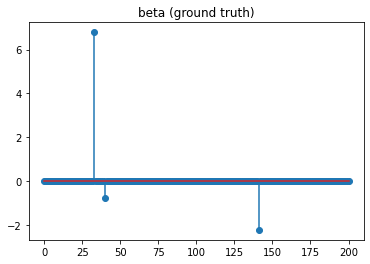

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# synthetic data
np.random.seed(19)
N = 40
d = 200

# non-zero components
nnz = 3

# selecting 3 components of beta 
# then assigning random values to those three components
prn = np.random.permutation(d+1)
betaTrue = np.zeros(d+1)
betaTrue[prn[0:nnz]] = 5*np.random.randn(nnz)

# set up of matrix X
X = np.random.randn(N,d)
X = np.insert(X,0,1,axis = 1)

noise = .001*np.random.randn(N)

# creating vector y of target values
y = X @ betaTrue + noise

plt.stem(betaTrue)
plt.title('beta (ground truth)')

In [2]:
# the goal of LASSO is to figure out beta
# we know beta is sparse but we don't know which are components of beta

# evaluate proximal operator of L1 norm.
def clip(beta, alpha):
    
    clipped = np.minimum(beta, alpha)
    clipped = np.maximum(clipped, -alpha)
    
    return clipped

# proximal operator function
def proxL1Norm(betaHat,alpha,penalizeAll = True):
    
    out = betaHat - clip(betaHat,alpha)
    
    if not penalizeAll:
        out[0] = betaHat[0]
    
    return out

In [3]:
# this function solves a lasso problem using the proximal gradient method

def solveLasso_proxGrad(X,y,lmbda):
# lambda is the parameter that weights the L1 regularization term
# lambda tells us how strongly the L1 regularization term is weighted
    max_iterations = 300
    # learning rate alpha
    alpha = .005
    
    # initializing beta
    beta = np.zeros(d+1)
    costfunVals = np.zeros(max_iterations)
    
    # for loop doing proximal gradient method iteration
    for t in range(max_iterations):
        
        # compute the gradient of L at each iteration here
        grad = X.T @ (X@beta - y)
        # applying proximal operator of L1 norm
        # updating beta
        beta = proxL1Norm(beta - alpha*grad, alpha*lmbda)
        
        costfunVals[t] = .5*np.linalg.norm(X@beta -y)**2 + lmbda*np.sum(np.abs(beta))
        
        print('Iteration: ', t, 'Objective function value: ', costfunVals[t])
    
    return beta, costfunVals

Iteration:  0 Objective function value:  771.518390980057
Iteration:  1 Objective function value:  552.2249522580435
Iteration:  2 Objective function value:  458.910526844542
Iteration:  3 Objective function value:  376.9967917932423
Iteration:  4 Objective function value:  330.270382851581
Iteration:  5 Objective function value:  286.95817654471193
Iteration:  6 Objective function value:  258.0010602059525
Iteration:  7 Objective function value:  232.2486983483563
Iteration:  8 Objective function value:  215.86628798622397
Iteration:  9 Objective function value:  204.25088832278274
Iteration:  10 Objective function value:  197.1027881282075
Iteration:  11 Objective function value:  191.8258920461954
Iteration:  12 Objective function value:  187.3151613751046
Iteration:  13 Objective function value:  183.17919006983516
Iteration:  14 Objective function value:  179.28276711861506
Iteration:  15 Objective function value:  175.73693089778382
Iteration:  16 Objective function value:  172.3

<StemContainer object of 3 artists>

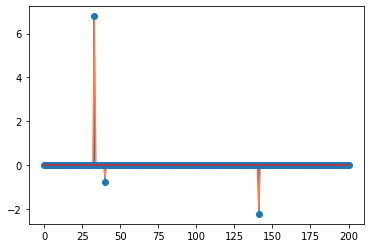

In [5]:
lmbda = 10
beta, costfunVals = solveLasso_proxGrad(X,y,lmbda)

plt.figure()
plt.stem(beta, markerfmt = 'coral')
plt.stem(betaTrue)


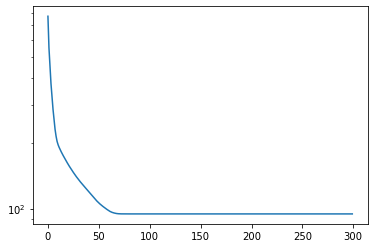

In [6]:
# plot of objective function value by number of iterations
plt.figure()
plt.semilogy(costfunVals)

# value converged after about 75 iterations